In [45]:
import pandas as pd
from  sympy import *
import math 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy
import scipy.io as sio
import time
import scipy
import scipy.stats

In [46]:
training = sio.loadmat(r'ex8data1.mat')

In [47]:
X = training['X']

In [48]:
x1 = X[:,0]
x2 = X[:,1]

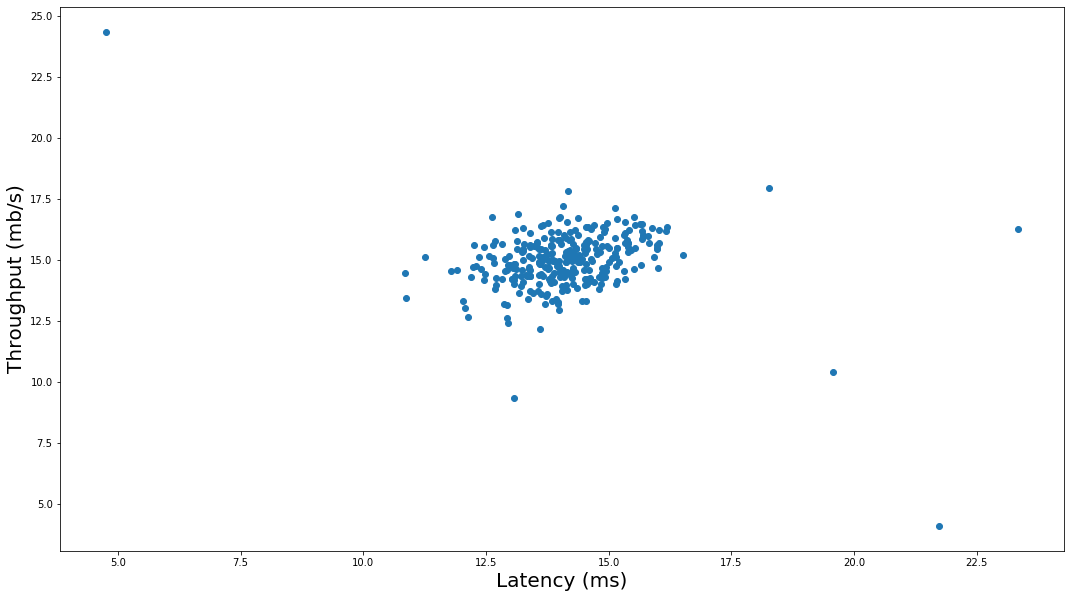

In [49]:
fig, ax = plt.subplots()

plt.scatter(x1,x2)

ax.set_title('',size = 30)

ax.set_ylabel('Throughput (mb/s)', size = 20)
ax.set_xlabel('Latency (ms)', size = 20)
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=0)
plt.show()

In [50]:
def estimateGaussian(X): 
        
    meanz = X.mean(axis = 0)
    cov = np.cov(X.T)
    
    return meanz,cov 

In [51]:
def evaluateGaussian(X,meanz,cov): 
    
    return scipy.stats.multivariate_normal.pdf(X,mean = meanz, cov = cov)

In [52]:
mu,sigma = estimateGaussian(X)

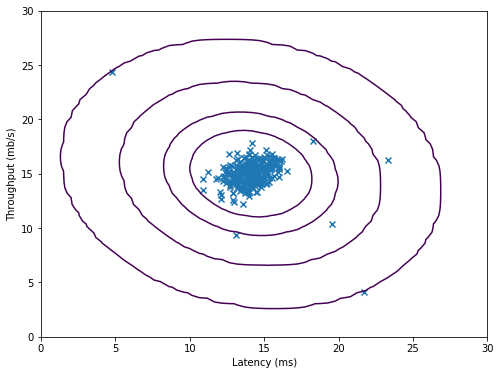

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x")
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))

X_new = np.vstack((X1.flatten(),X2.flatten())).T

Z = evaluateGaussian(X_new, mu, sigma)
Z = Z.reshape((70,70))
contour_lvl = np.asarray([10**-20,10**-10, 10**-5,10**-3,10**-1])


plt.contour(X1,X2,Z,contour_lvl)

plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Latency (ms)");
plt.ylabel("Throughput (mb/s)");

## 1.3: Selecting the threshold, epsilon.

In [54]:
def selectThreshold(Xcv, ycv, mu, sigma):
    
    final = []
    
    Pcv= scipy.stats.multivariate_normal.pdf(Xcv,mean = mu, cov = sigma)
    
    step = (Pcv.max() - Pcv.min())/1000
    
    for epsilon in np.arange(Pcv.min(), Pcv.max(),step):
    
#         bool_array = np.asarray([1 if x < epsilon else 0 for x in Pcv])

#         tp = (ycv == bool_array.reshape(bool_array.shape[0],1)).astype(int)[np.where(ycv == 0)].sum()

#         fp = (ycv != bool_array.reshape(bool_array.shape[0],1)).astype(int)[np.where(ycv == 1)].sum()

#         fn = (ycv != bool_array.reshape(bool_array.shape[0],1)).astype(int)[np.where(ycv == 0)].sum()
    
        predictions = (Pcv<epsilon)[:,np.newaxis]

        tp = np.sum(predictions[ycv==1]==1)

        fp = np.sum(predictions[ycv==0]==1)

        fn = np.sum(predictions[ycv==1]==0)
        

        precision = tp/(tp + fp)

        recall    = tp/(tp + fn)

        F1 = 2*precision*recall / (precision + recall)  
        
        if not np.isnan(F1):
    
            final.append([F1,epsilon])          
    
    return np.asarray(final)

In [55]:
Xcv = training['Xval']
ycv = training['yval']

In [56]:
final = selectThreshold(Xcv, ycv, mu, sigma)

C:\Users\mubar\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in long_scalars


In [57]:
epsilon = final[np.argmax(final[:,0],axis = 0)][1]

In [58]:
F1 = final[np.argmax(final[:,0],axis = 0)][0]

In [59]:
F1, epsilon 

(0.8750000000000001, 9.036240676156386e-05)

In [60]:
def findAnomalies(X, epsilon, mu, sigma):
    
    Pcv= scipy.stats.multivariate_normal.pdf(X,mean = mu, cov = sigma)
    
    bool_array = np.asarray([1 if x < epsilon else 0 for x in Pcv])
    
    return bool_array

In [61]:
anomaly_locs = findAnomalies(X, epsilon, mu, sigma)

In [62]:
anomaly_locs = X[np.where(anomaly_locs ==1)]
anomalyX = anomaly_locs[:,0]
anomalyY = anomaly_locs[:,1]

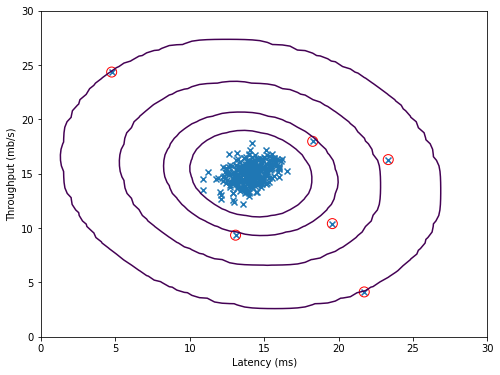

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x")
plt.scatter(anomalyX,anomalyY,marker="o", s = 100, facecolors='none', edgecolors='r')
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))

X_new = np.vstack((X1.flatten(),X2.flatten())).T

Z = evaluateGaussian(X_new, mu, sigma)
Z = Z.reshape((70,70))
contour_lvl = np.asarray([10**-20,10**-10, 10**-5,10**-3,10**-1])

plt.contour(X1,X2,Z,contour_lvl)

plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Latency (ms)");
plt.ylabel("Throughput (mb/s)");

## 1.4 High Dimensionality Dataset

In [64]:
training = sio.loadmat(r'ex8data2.mat')

In [65]:
X = training['X']

In [66]:
mu,sigma = estimateGaussian(X)

In [67]:
probs = evaluateGaussian(X,mu,sigma)

In [68]:
Xcv = training['Xval']
ycv = training['yval']

In [69]:
final = selectThreshold(Xcv, ycv, mu, sigma)

C:\Users\mubar\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in long_scalars


In [70]:
epsilon = final[np.argmax(final[:,0],axis = 0)][1]

In [71]:
F1 = final[np.argmax(final[:,0],axis = 0)][0]

In [72]:
epsilon, F1

(1.7464996396712342e-18, 0.5517241379310345)

In [73]:
anomaly_locs = findAnomalies(X, epsilon, mu, sigma)

In [74]:
anomaly_locs = X[np.where(anomaly_locs ==1)]

In [75]:
anomaly_locs.shape

(122, 11)